
Random Forest Evaluation for Survival_Rate:
MAE: 14.82
MSE: 296.04
RMSE: 17.21
R-squared (R2 Score): -0.00


Gradient Boosting Evaluation for Survival_Rate:
MAE: 14.82
MSE: 296.24
RMSE: 17.21
R-squared (R2 Score): -0.00


XGBoost Evaluation for Survival_Rate:
MAE: 14.84
MSE: 298.59
RMSE: 17.28
R-squared (R2 Score): -0.01



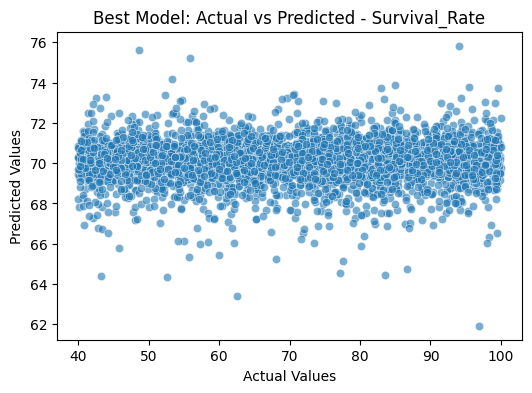


Random Forest Evaluation for Tumor_Growth_Rate:
MAE: 0.71
MSE: 0.69
RMSE: 0.83
R-squared (R2 Score): -0.00


Gradient Boosting Evaluation for Tumor_Growth_Rate:
MAE: 0.72
MSE: 0.69
RMSE: 0.83
R-squared (R2 Score): -0.01


XGBoost Evaluation for Tumor_Growth_Rate:
MAE: 0.72
MSE: 0.70
RMSE: 0.83
R-squared (R2 Score): -0.01



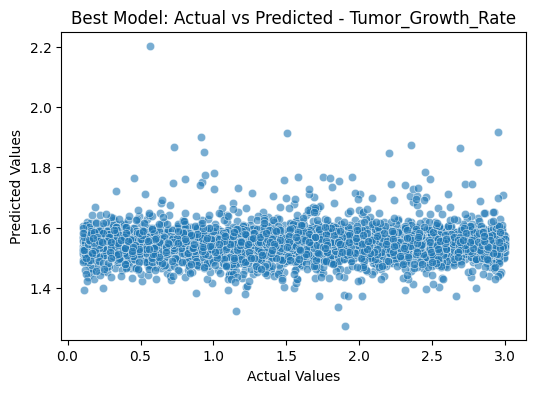

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("brain_tumor_dataset.csv")

# Drop non-relevant columns
df = df.drop(columns=["Patient_ID"])

# Handle missing values (fill with median or mode)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "Tumor_Type", "Location", "Histology", "Stage",
                    "Symptom_1", "Symptom_2", "Symptom_3", "Radiation_Treatment",
                    "Surgery_Performed", "Chemotherapy", "Family_History", "MRI_Result",
                    "Follow_Up_Required"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()

# Function for training and evaluating regression models
def train_and_evaluate_regression(target_column):
    # Prepare features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Standardize numerical features
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Random Forest": RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42)
    }

    best_model = None
    best_r2 = -1

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Print results
        print(f"\n{name} Evaluation for {target_column}:")
        print(f"MAE: {mae:.2f}")
        print(f"MSE: {mse:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R-squared (R2 Score): {r2:.2f}\n")

        # Choose the best model
        if r2 > best_r2:
            best_r2 = r2
            best_model = model

    # Plot actual vs predicted for the best model
    y_pred_best = best_model.predict(X_test)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Best Model: Actual vs Predicted - {target_column}")
    plt.show()

# Run regression models for each target variable

# 1. Survival Rate Prediction
train_and_evaluate_regression("Survival_Rate")

# 2. Tumor Growth Rate Prediction
train_and_evaluate_regression("Tumor_Growth_Rate")
